In [1]:
from utils import *

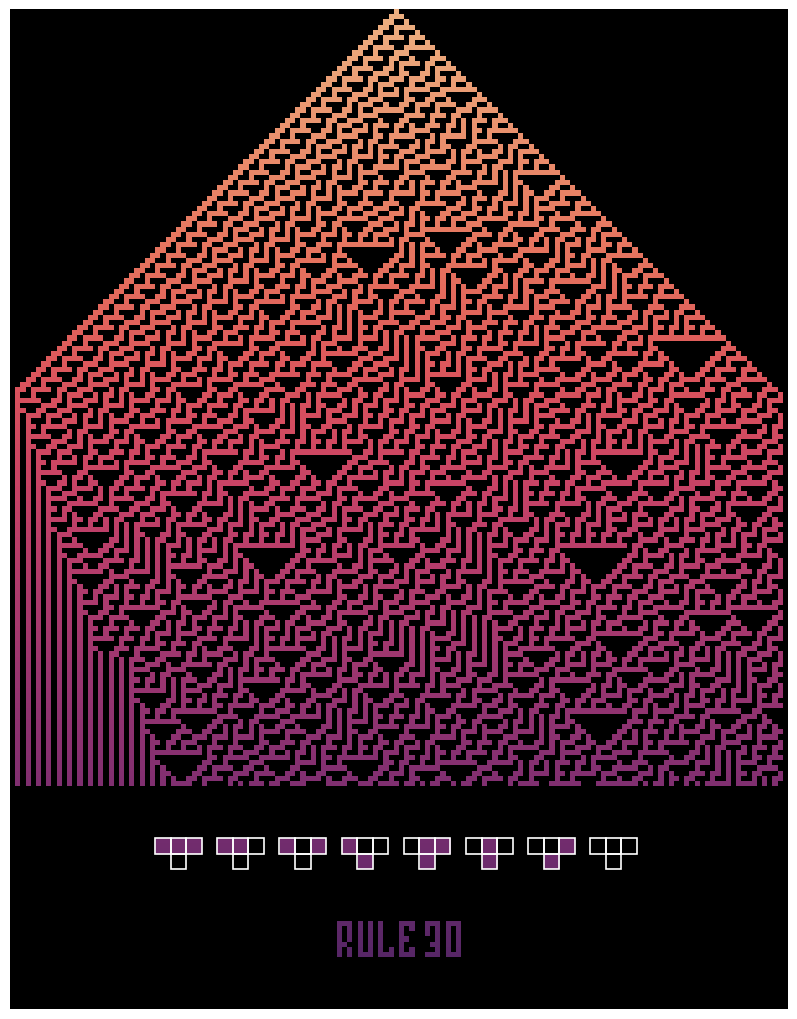

In [5]:
nrule = 30
niter = 150

img, expl_rect = get_full_image(nrule=nrule, niter=niter)
final_img = np.zeros([img.shape[0], img.shape[1], 3])
colors = sns.color_palette("flare", as_cmap=True).colors

for i in range(img.shape[0]):
    index = int(i/img.shape[0]*256)
    for j in range(img.shape[1]):
        if img[i,j]:
            final_img[i,j] = colors[index]

plot_clean(final_img, expl_rect=expl_rect, upscale=2, color_rect="white", figsize = (20,10))

In [ ]:
filename = f"rule_{rule_number}_steps_{niter}_image.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0, transparent=True, dpi=100)
plt.close()